Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
# Will data as my df and data_num for numeric cleaning

In [7]:
data = pd.read_csv('C:/Users/JC88Main/Week4/Day1/Lab1/lab-cleaning-numerical-data-master/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

First look at its main features (head, shape, info).

In [8]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
display(data.shape)

(9134, 24)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [13]:
PE8_header = []
def change_titels(df):
    for i in df.columns:
        x = i.lower().replace(' ','_')
        PE8_header.append(x)
        
    df.columns = PE8_header
    display(df.head())
    
change_titels(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Change effective to date column to datetime format.

In [12]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [14]:
#Continuous

data['customer_lifetime_value'].value_counts()

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [15]:
#Discrete

data['months_since_last_claim'].value_counts()

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64

In [16]:
data_num = data.select_dtypes(np.number)
data_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [20]:
# 0 Nan on numerical
data_num.isnull().sum()/len(data_num)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [21]:
#Now will check categorical data to build correlation heatmap


data_cat = data.select_dtypes(exclude=np.number)
data_cat.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [22]:
#Building discrete axis


data_num['income'].value_counts()

0        2317
95697      12
27972       7
25370       7
61108       7
         ... 
36529       1
25859       1
38179       1
70190       1
21941       1
Name: income, Length: 5694, dtype: int64

In [23]:
data_num['number_of_policies'].value_counts()

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [24]:
data_num['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [28]:
#Here I'm building the display table of continuous and discrete values
#Uff...

def split_df(data_num, number_unique=6):     #defining number of numerical (continuous) table
    discrete_cols = []   #top table
    continuous_cols = [] #bottom table
    for col in data_num.columns:
        if (data_num[col].nunique() < number_unique): #using unique values
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)
    return data_num[discrete_cols], data_num[continuous_cols]

data_discrete, data_continuous = split_df(data_num, number_unique=10)

In [29]:
display(data_discrete.head()) # top table
display(data_continuous.head()) # Bottom table


,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


Plot a correlation matrix, comment what you see.

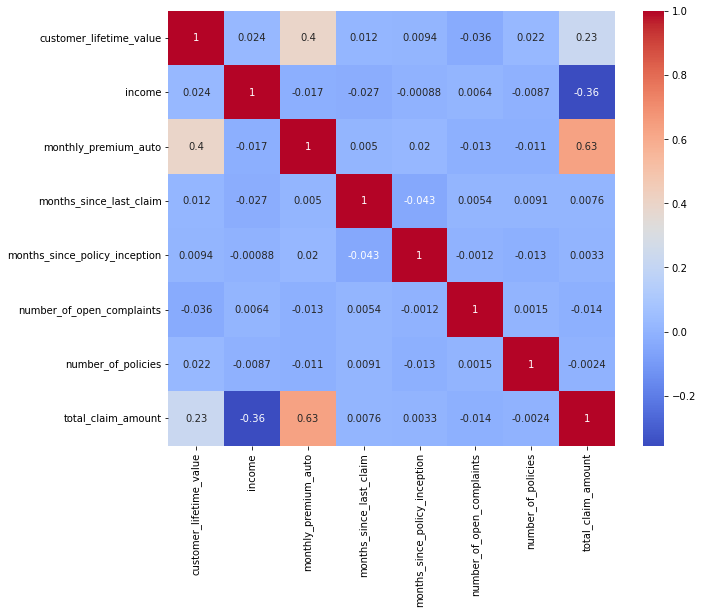

In [37]:
corr_matrix=data.corr(method='pearson')# standart correlation coeficient (pearson)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

In [38]:
# Not much overall correlation between variables
#Nevertheless we can verify that there is a positive correlatio between monthly premium auto and total claim amout, a negative correlation between 
#income and total claim amount and finally a slight positive correlation between customer lifetime value and monthly premium auto

Create a function to plot every discrete variable. Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

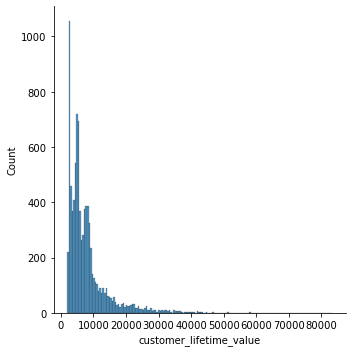

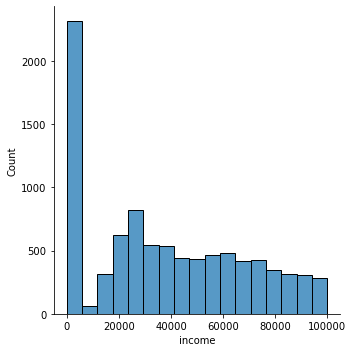

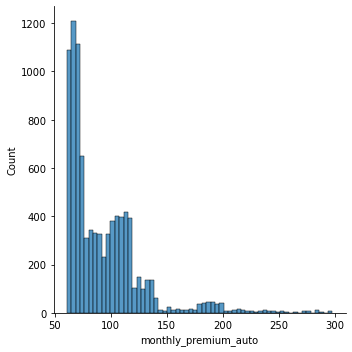

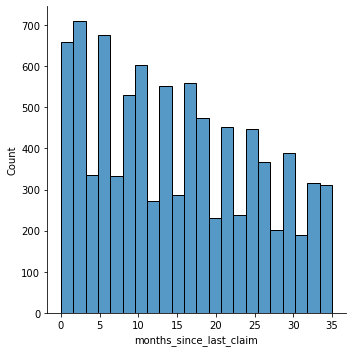

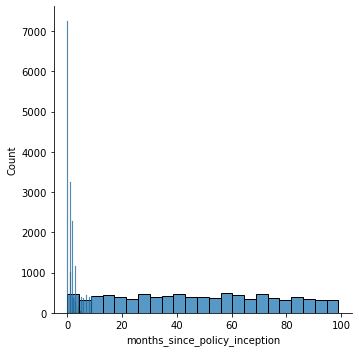

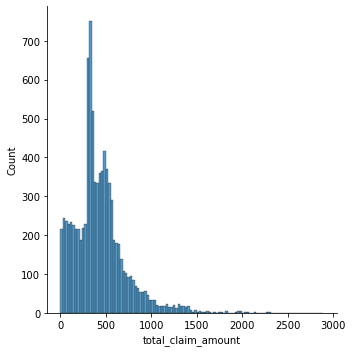

In [40]:
#Discrete

#using same code as above for the tables, but this time requested a histplot

def split_df(data_num, number_unique=6):
    for col in data_num.columns:
        if (data_num[col].nunique() < number_unique):
            sns.histplot(x=col,data=data_num)
        else:
            sns.displot(x=col,data=data_num)
split_df(data_num,10)

Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [41]:
#For continuous variables will use boxplot as discussed in the class

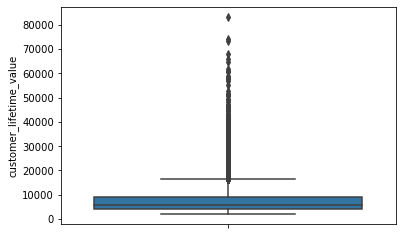

In [42]:
sns.boxplot(y=data_cont['customer_lifetime_value'])
plt.show()

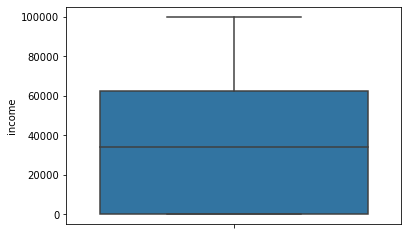

In [43]:
sns.boxplot(y=data_cont['income'])
plt.show()

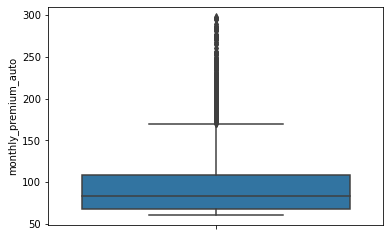

In [44]:
sns.boxplot(y=data_cont['monthly_premium_auto'])
plt.show()

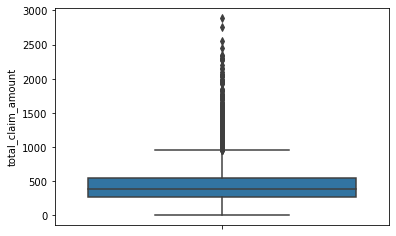

In [45]:
sns.boxplot(y=data_cont['total_claim_amount'])
plt.show()

Comment what you can see in the plots.

In [47]:
#Not too many outliers, but will try to clear them

Did you find outliers? Comment what you will do with them.

In [48]:
# Yes will try to eliminate them like we saw on class, but this time I will have to do it for all my 4 variables

In [52]:
iqr = np.nanpercentile(data['customer_lifetime_value'],75) - np.nanpercentile(data['customer_lifetime_value'],25)
upper_limit = np.nanpercentile(data['customer_lifetime_value'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = data[data['customer_lifetime_value'] > upper_limit]
len(extraordinary_points)

16414.039911750002


817

In [53]:
data_timelag_outliers_dropped = data[data['customer_lifetime_value'] <= upper_limit].copy()

<AxesSubplot:>

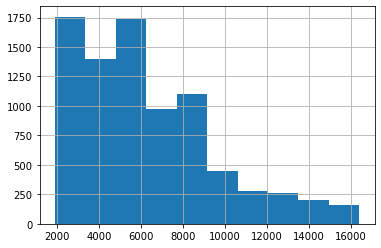

In [55]:
data_timelag_outliers_dropped['customer_lifetime_value'].hist()

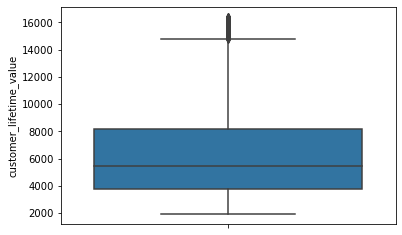

In [57]:
sns.boxplot(y=data_timelag_outliers_dropped['customer_lifetime_value'])
plt.show()

In [58]:
iqr = np.nanpercentile(data['income'],75) - np.nanpercentile(data['income'],25)
upper_limit = np.nanpercentile(data['income'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = data[data['income'] > upper_limit]
len(extraordinary_points)

155800.0


0

In [59]:
data_timelag_outliers_dropped = data[data['income'] <= upper_limit].copy()

<AxesSubplot:>

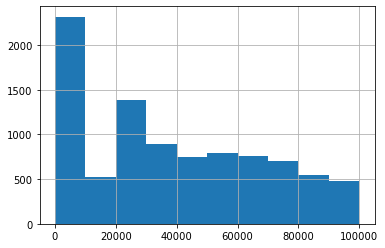

In [60]:
data_timelag_outliers_dropped['income'].hist()

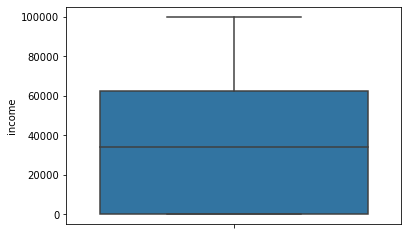

In [61]:
sns.boxplot(y=data_timelag_outliers_dropped['income'])
plt.show()

In [62]:
iqr = np.nanpercentile(data['monthly_premium_auto'],75) - np.nanpercentile(data['monthly_premium_auto'],25)
upper_limit = np.nanpercentile(data['monthly_premium_auto'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = data[data['monthly_premium_auto'] > upper_limit]
len(extraordinary_points)

170.5


430

In [64]:
data_timelag_outliers_dropped = data[data['monthly_premium_auto'] <= upper_limit].copy()

<AxesSubplot:>

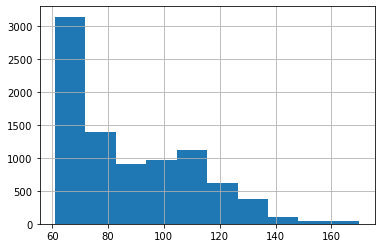

In [65]:
data_timelag_outliers_dropped['monthly_premium_auto'].hist()

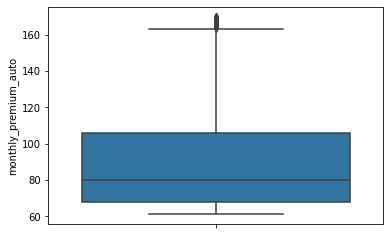

In [66]:
sns.boxplot(y=data_timelag_outliers_dropped['monthly_premium_auto'])
plt.show()

In [68]:
iqr = np.nanpercentile(data['total_claim_amount'],75) - np.nanpercentile(data['total_claim_amount'],25)
upper_limit = np.nanpercentile(data['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

extraordinary_points = data[data['total_claim_amount'] > upper_limit]
len(extraordinary_points)

960.3997301249999


453

In [69]:
data_timelag_outliers_dropped = data[data['total_claim_amount'] <= upper_limit].copy()

<AxesSubplot:>

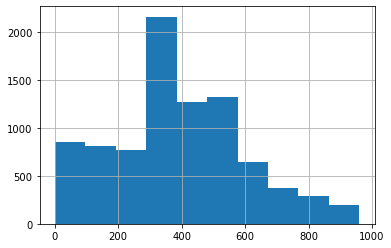

In [70]:
data_timelag_outliers_dropped['total_claim_amount'].hist()

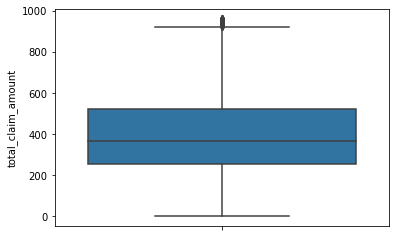

In [71]:
sns.boxplot(y=data_timelag_outliers_dropped['total_claim_amount'])
plt.show()

Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [72]:
# 0 Nan Values
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64